Requires py3 and new saga

# Imports/Setup 

In [1]:
import os
import sys
import urllib

import numpy as np

from astropy import units as u
from astropy import table
from astropy.coordinates import SkyCoord

import tqdm

In [2]:
%matplotlib inline
from matplotlib import style, pyplot as plt

The below cells build the saga repo and sets the path to look for it

In [3]:
working_dir = os.path.abspath('..')

In [4]:
%cd ../../saga
sagadir = !pwd
sagadir = sagadir[0]
!python setup.py build
%cd $working_dir

/Users/erik/projects/saga/saga
running build
running build_py
/Users/erik/projects/saga/erik


In [5]:
sagalibdir = os.path.join(sagadir, 'build/lib')
print('Adding', sagalibdir, 'to the python path')
sys.path.insert(0, sagalibdir)

import SAGA as saga

Adding /Users/erik/projects/saga/saga/build/lib to the python path


In [6]:
import decals
import mmtbino

from importlib import reload

# Get Scooby Doo Builtins

In [7]:
db = saga.Database(os.path.join(os.environ['HOME'],'Dropbox/SAGA/'))
hostcat = saga.HostCatalog(db)
objcat = saga.ObjectCatalog(db)

In [8]:
scoobydoo = hostcat.load_single('ScoobyDoo')
scoobydoo

NSAID,RA,Dec,PGC#,vhelio,distance,r,i,z,I,K,K_err,flag,K_abs,r_abs,b,dist_to_group,brightest_K_nearby,SDSS_FRACGOOD,RA_sub,Dec_sub,othername,vhelio_sub,vhelio_err,distance_sub,dist_2MASS_NSA,u,u_err,A_u,M_u,g,g_err,A_g,M_g,r_sub,r_err,A_r,M_r,i_sub,i_err,A_i,M_i,z_sub,z_err,A_z,M_z,J,J_err,A_J,M_J,H,H_err,A_H,M_H,K_sub,K_err_sub,A_K,M_K,stellar_mass,sersic_n,MK_compiled,SAGA_name,coord
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"deg,deg"
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str16,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str11,object
161174,182.792,20.1757,38802,2448.24,36.3129,12.9512,12.6154,12.3487,11.95,9.734,0.029,0,-23.0663,-19.8491,78.4598,6.0357,12.477,0.982772,182.792,20.1757,12111016+2010324,2448.24,-1,36.3129,0.378163,14.4094,0.00555798,0.137124,-18.5503,12.9839,0.000860291,0.106846,-19.939,12.2563,0.000770509,0.0739157,-20.6268,11.8795,0.00090899,0.0549273,-20.9834,11.5798,0.00181046,0.0408558,-21.2674,10.686,0.019,0.0229349,-22.1351,10.026,0.026,0.0145243,-22.7894,9.745,0.027,0.00976916,-23.0486,10100000000.0,1.73943,-23.0663,ScoobyDoo,"182.792,20.1757"


In [9]:
basecatalog = objcat.load('scoobydoo')[0]
basecatalog

OBJID,RA,DEC,PHOTPTYPE,PHOT_SG,FLAGS,clean,SATURATED,BAD_COUNTS_ERROR,BINNED1,TOO_FEW_GOOD_DETECTIONS,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,MODELMAGERR_U,MODELMAGERR_G,MODELMAGERR_R,MODELMAGERR_I,MODELMAGERR_Z,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,DERED_U,DERED_G,DERED_R,DERED_I,DERED_Z,PETRORAD_U,PETRORAD_G,PETRORAD_R,PETRORAD_I,PETRORAD_Z,PETRORADERR_U,PETRORADERR_G,PETRORADERR_R,PETRORADERR_I,PETRORADERR_Z,DEVRAD_U,DEVRADERR_U,DEVRAD_G,DEVRADERR_G,DEVRAD_R,DEVRADERR_R,DEVRAD_I,DEVRADERR_I,DEVRAD_Z,DEVRADERR_Z,DEVAB_U,DEVAB_G,DEVAB_R,DEVAB_I,DEVAB_Z,CMODELMAG_U,CMODELMAGERR_U,CMODELMAG_G,CMODELMAGERR_G,CMODELMAG_R,CMODELMAGERR_R,CMODELMAG_I,CMODELMAGERR_I,CMODELMAG_Z,CMODELMAGERR_Z,PSFMAG_U,PSFMAGERR_U,PSFMAG_G,PSFMAGERR_G,PSFMAG_R,PSFMAGERR_R,PSFMAG_I,PSFMAGERR_I,PSFMAG_Z,PSFMAGERR_Z,FIBERMAG_U,FIBERMAGERR_U,FIBERMAG_G,FIBERMAGERR_G,FIBERMAG_R,FIBERMAGERR_R,FIBERMAG_I,FIBERMAGERR_I,FIBERMAG_Z,FIBERMAGERR_Z,FRACDEV_U,FRACDEV_G,FRACDEV_R,FRACDEV_I,FRACDEV_Z,Q_U,U_U,Q_G,U_G,Q_R,U_R,Q_I,U_I,Q_Z,U_Z,EXPAB_U,EXPRAD_U,EXPPHI_U,EXPAB_G,EXPRAD_G,EXPPHI_G,EXPAB_R,EXPRAD_R,EXPPHI_R,EXPAB_I,EXPRAD_I,EXPPHI_I,EXPAB_Z,EXPRAD_Z,EXPPHI_Z,FIBER2MAG_R,FIBER2MAGERR_R,EXPMAG_R,EXPMAGERR_R,PETROR50_R,PETROR90_R,PETROMAG_R,SB_EXP_R,SB_PETRO_R,J,JERR,H,HERR,K,KERR,survey,SPEC_Z,SPEC_Z_ERR,SPEC_Z_WARN,PHOTOZ,PHOTOZ_ERR,W1,W1ERR,W2,W2ERR,HOST_RA,HOST_DEC,HOST_DIST,HOST_VHOST,HOST_MK,HOST_MR,HOST_MG,HOST_NSAID,HOST_SAGA_NAME,HOST_NGC_NAME,RHOST_ARCM,RHOST_KPC,OBJ_NSAID,SATS,PROBABILITY_CLASS1,RESCALED_PROBABILITY_CLASS1,REMOVE,TELNAME,MASKNAME,ZQUALITY,SPEC_CLASS,SPECOBJID,SPEC_REPEAT,SPEC_SN,SPEC_HA_EW,SPEC_HA_EWERR,u_mag,g_mag,r_mag,i_mag,z_mag,ug,ug_err,gr,gr_err,ri,ri_err,iz,iz_err,coord
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"deg,deg"
int64,float64,float64,int16,str40,int64,int32,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,str32,float32,float32,int32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str48,str48,float64,float64,int64,int64,float64,float64,int64,str6,str48,int64,str2,str48,str48,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,object
1237668298203201559,182.792360066,20.1756649725,3,GALAXY,1161153266978832,1,0,0,268435456,0,14.4094,12.9839,12.2563,11.8795,11.5798,0.00555798,0.000860291,0.000770509,0.00090899,0.00181046,0.00647745,0.00178272,0.00162387,0.00161787,0.00225035,0.166261,0.122333,0.0887263,0.0672785,0.0477013,14.3979,12.9198,12.1148,11.7508,11.4743,24.1227,27.8057,31.0638,31.1726,27.8346,0.700152,0.582338,0.711667,0.848577,0.74567,29.6754,0.432711,29.6697,0.223488,29.6725,0.235934,27.5823,0.15488,27.573,0.233525,0.964339,0.669669,0.708101,0.714967,0.727419,14.7634,0.00605514,13.1691,0.00178303,12.3024,0.0016535,11.9436,0.00164623,11.6509,0.00228909,1

# Get Scooby Doo from DECaLS 

In [230]:
decals_path = os.path.join(os.environ['HOME'], 'astrodata', 'decals', 'dr5')

bricks_fn = os.path.join(decals_path, 'survey-bricks.fits.gz')
bricks_dr_fn = os.path.join(decals_path, 'survey-bricks-dr5.fits.gz')

bricks = table.Table.read(bricks_fn)
bricks_dr = table.Table.read(bricks_dr_fn)

In [231]:
bricks_needed = decals.find_host_bricks(table.Table(scoobydoo), bricks_dr, bricks, environfactor=300*u.kpc)
bricks_needed

brickname,RA1,RA2,DEC1,DEC2,ra,dec,nexp_g,nexp_r,nexp_z,nexphist_g [6],nexphist_r [6],nexphist_z [6],nobjs,npsf,nsimp,nrex,nexp,ndev,ncomp,psfsize_g,psfsize_r,psfsize_z,psfdepth_g,psfdepth_r,psfdepth_z,galdepth_g,galdepth_r,galdepth_z,ebv,trans_g,trans_r,trans_z,ext_g,ext_r,ext_z,wise_nobs [4],trans_wise [4],ext_w1,ext_w2,ext_w3,ext_w4,closest_host_idx,closest_host_name
str32,float64,float64,float64,float64,float64,float64,int16,int16,int16,int32,int32,int32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,int64,str21
1822p200,182.123893805,182.389380531,19.875,20.125,182.256637168,20.0,2,2,3,74055 .. 0,220277 .. 0,3432 .. 720132,3618,1625,0,1550,357,72,14,1.2735,1.12723,1.41585,24.3534,23.9419,23.1587,24.0621,23.5724,22.8713,0.038703,0.891751,0.925728,0.95775,0.124391,0.083792,0.0468694,78 .. 14,0.993462 .. 0.999676,0.00712137,0.00437343,0.000932684,0.000352236,0,ScoobyDoo
1822p202,182.127031019,182.392909897,20.125,20.375,182.259970458,20.25,2,1,3,92738 .. 0,871495 .. 0,8256 .. 0,3851,1658,0,1678,391,104,20,1.10123,0.934669,1.47498,24.5655,23.7695,23.0954,24.214,23.3321,22.8191,0.0335449,0.905471,0.935298,0.963276,0.107813,0.0726248,0.0406229,78 .. 12,0.994331 .. 0.999719,0.00617229,0.00379056,0.000808461,0.000305239,0,ScoobyDoo
1822p205,182.133333333,182.4,20.375,20.625,182.266666667,20.5,1,1,3,870598 .. 0,2052735 .. 0,2216 .. 0,3362,1354,0,1519,363,112,14,1.09793,0.937531,1.48331,24.3191,23.7768,23.0743,23.9466,23.3439,22.8034,0.029409,0.916625,0.943044,0.96773,0.0945206,0.0636706,0.0356143,78 .. 14,0.995028 .. 0.999754,0.00541127,0.00332321,0.00070873,0.000267629,0,ScoobyDoo
1825p197,182.385861561,182.65095729,19.625,19.875,182.518409426,19.75,2,2,3,90464 .. 0,89310 .. 0,2091 .. 0,3625,1590,0,1544,390,89,12,1.29125,1.15001,1.25176,24.3496,23.9371,23.0481,24.0649,23.5884,22.7343,0.0494611,0.863799,0.90608,0.946327,0.158968,0.107083,0.0598974,78 .. 14,0.991653 .. 0.999586,0.00910084,0.0055891,0.00119199,0.000450121,0,ScoobyDoo
1825p200,182.389380531,182.654867257,19.875,20.125,182.522123894,20.0,3,2,4,2069 .. 0,47944 .. 0,4300 .. 1209244,4252,2007,0,1685,447,94,19,1.21597,1.1067,1.46343,24.639,23.9595,23.2004,24.3385,23.5972,22.9258,0.036126,0.898579,0.930497,0.960507,0.116109,0.0782128,0.0437486,78 .. 13,0.993896 .. 0.999697,0.00664718,0.00408225,0.000870635,0.000328737,0,ScoobyDoo
1825p202,182.392909897,182.658788774,20.125,20.375,182.525849335,20.25,3,2,3,14302 .. 0,145877 .. 0,6468 .. 318542,4007,1813,0,1697,386,99,12,1.20255,1.10638,1.43073,24.6309,23.9327,23.122,24.3279,23.5609,22.8449,0.03115,0.911913,0.939775,0.965853,0.100116,0.0674397,0.0377226,78 .. 14,0.994735 .. 0.999739,0.00573163,0.00351998,0.000750694,0.000283488,0,ScoobyDoo
1825p205,182.4,182.666666667,20.375,20.625,182.533333333,20.5,2,1,3,83620 .. 0,1404436 .. 0,710 .. 0,3745,1672,0,1603,350,100,20,1.09945,0.943159,1.48052,24.5884,23.7864,23.0866,24.2319,23.3442,22.8155,0.0291895,0.917221,0.943457,0.967967,0.093815,0.0631953,0.0353485,79 .. 14,0.995065 .. 0.999755,0.00537088,0.00329841,0.000703485,0.000265623,0,ScoobyDoo
1825p207,182.403560831,182.670623145,20.625,20.875,182.537091988,20.75,2,1,3,147222 .. 0,1451826 .. 0,1420 .. 0,3337,1386,0,1492,333,113,13,1.10418,0.948005,1.50742,24.4785,23.6658,23.0562,24.1234,23.256,22.8011,0.0271711,0.922718,0.947261,0.970149,0.0873279,0.0588254,0.0329042,77 .. 12,0.995406 .. 0.999772,0.00499946,0.00307034,0.000654854,0.000247239,0,ScoobyDoo
1827p197,182.65095729,182.916053019,19.625,19.875,182.783505155,19.75,2,2,3,14851 .. 0,12832 .. 0,974 .. 219441,4071,1742,0,1689,488,131,21,1.28426,1.14498,1.24175,24.3547,23.9475,23.0997,24.0658,23.594,22.772,0.0412583,0.885031,0.921023,0.955024,0.132604,0.0893242,0.0499638,78 .. 14,0.993032 .. 0.999654,0.00759152,0.00466216,0.000994347,0.000375476,0,ScoobyDoo


In [232]:
decals.download_bricks(bricks_needed, 5);

decals_dr5/catalogs/tractor-1822p200.fits already exists, skipping...
decals_dr5/catalogs/tractor-1822p202.fits already exists, skipping...
decals_dr5/catalogs/tractor-1822p205.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p197.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p200.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p202.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p205.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p207.fits already exists, skipping...
decals_dr5/catalogs/tractor-1827p197.fits already exists, skipping...
decals_dr5/catalogs/tractor-1827p200.fits already exists, skipping...
decals_dr5/catalogs/tractor-1827p202.fits already exists, skipping...
decals_dr5/catalogs/tractor-1828p205.fits already exists, skipping...
decals_dr5/catalogs/tractor-1828p207.fits already exists, skipping...
decals_dr5/catalogs/tractor-1830p197.fits already exists, skipping...
decals_dr5/catalogs/

In [233]:
brick_cats = []
for row in tqdm.tqdm_notebook(bricks_needed):
    cat = table.Table.read(row['local_fn'])
    brick_cats.append(cat)

In [234]:
bricks_cat = table.vstack(brick_cats)
decals.mags_catalog(bricks_cat, extcorr=True)

bricks_cat['coord'] = SkyCoord(bricks_cat['ra'], bricks_cat['dec'])
bricks_cat['hostsep'] = bricks_cat['coord'].separation(scoobydoo['coord'])
bricks_cat['hostsep_phys'] = (bricks_cat['hostsep']*scoobydoo['distance']*u.Mpc).to(u.kpc, u.dimensionless_angles())
decals.mags_catalog(bricks_cat)

bricks_cat

/Users/erik/projects/saga/erik/decals.py:116: RuntimeWarning: divide by zero encountered in log10
  mag = np.array(22.5 - 2.5*np.log10(flux))
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy-3.0.dev19816-py3.6-macosx-10.7-x86_64.egg/astropy/units/quantity.py:1105: RuntimeWarning: divide by zero encountered in power
  return super(Quantity, self).__pow__(other)
/Users/erik/projects/saga/erik/decals.py:116: RuntimeWarning: invalid value encountered in log10
  mag = np.array(22.5 - 2.5*np.log10(flux))
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy-3.0.dev19816-py3.6-macosx-10.7-x86_64.egg/astropy/units/quantity.py:1059: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


release,brickid,brickname,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq [5],ebv,mjd_min,mjd_max,flux_u,flux_g,flux_r,flux_i,flux_z,flux_Y,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_u,flux_ivar_g,flux_ivar_r,flux_ivar_i,flux_ivar_z,flux_ivar_Y,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,apflux_u [8],apflux_g [8],apflux_r [8],apflux_i [8],apflux_z [8],apflux_Y [8],apflux_resid_u [8],apflux_resid_g [8],apflux_resid_r [8],apflux_resid_i [8],apflux_resid_z [8],apflux_resid_Y [8],apflux_ivar_u [8],apflux_ivar_g [8],apflux_ivar_r [8],apflux_ivar_i [8],apflux_ivar_z [8],apflux_ivar_Y [8],mw_transmission_u,mw_transmission_g,mw_transmission_r,mw_transmission_i,mw_transmission_z,mw_transmission_Y,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,nobs_u,nobs_g,nobs_r,nobs_i,nobs_z,nobs_Y,nobs_w1,nobs_w2,nobs_w3,nobs_w4,rchisq_u,rchisq_g,rchisq_r,rchisq_i,rchisq_z,rchisq_Y,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,fracflux_u,fracflux_g,fracflux_r,fracflux_i,fracflux_z,fracflux_Y,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracmasked_u,fracmasked_g,fracmasked_r,fracmasked_i,fracmasked_z,fracmasked_Y,fracin_u,fracin_g,fracin_r,fracin_i,fracin_z,fracin_Y,anymask_u,anymask_g,anymask_r,anymask_i,anymask_z,anymask_Y,allmask_u,allmask_g,allmask_r,allmask_i,allmask_z,allmask_Y,wisemask_w1,wisemask_w2,psfsize_u,psfsize_g,psfsize_r,psfsize_i,psfsize_z,psfsize_Y,psfdepth_u,psfdepth_g,psfdepth_r,psfdepth_i,psfdepth_z,psfdepth_Y,galdepth_u,galdepth_g,galdepth_r,galdepth_i,galdepth_z,galdepth_Y,wise_coadd_id,lc_flux_w1 [7],lc_flux_w2 [7],lc_flux_ivar_w1 [7],lc_flux_ivar_w2 [7],lc_nobs_w1 [7],lc_nobs_w2 [7],lc_fracflux_w1 [7],lc_fracflux_w2 [7],lc_rchisq_w1 [7],lc_rchisq_w2 [7],lc_mjd_w1 [7],lc_mjd_w2 [7],fracdev,fracdev_ivar,shapeexp_r,shapeexp_r_ivar,shapeexp_e1,shapeexp_e1_ivar,shapeexp_e2,shapeexp_e2_ivar,shapedev_r,shapedev_r_ivar,shapedev_e1,shapedev_e1_ivar,shapedev_e2,shapedev_e2_ivar,mag_u,mag_err_u,mag_g,mag_err_g,mag_r,mag_err_r,mag_i,mag_err_i,mag_z,mag_err_z,mag_Y,mag_err_Y,coord,hostsep,hostsep_phys
,,,,,,deg,deg,1/deg^2,1/deg^2,,,,mag,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,arcsec,1/arcsec^2,,,,,arcsec,1/arcsec^2,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,"deg,deg",deg,kpc
int16,int32,str32,int32,bool,str16,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float

## Select targets

want to use gri cuts and r<23

In [373]:
from SAGA.objects import cuts

In [374]:
target_cat = bricks_cat.copy()
for color in ['u-g', 'g-r', 'r-i', 'r-z']:
    c1, c2 = color.split('-')
    target_cat[c1+c2] = target_cat['mag_'+c1] - target_cat['mag_'+c2]
    target_cat[c1+c2+'_err'] = np.hypot(target_cat['mag_err_'+c1], target_cat['mag_err_'+c2])
    
# add columns that `write_bino_input` understands
target_cat['name'] = np.char.add(target_cat['brickname'],np.char.add('-', target_cat['objid'].astype(str)))
target_cat['magnitude'] = target_cat['mag_r']
target_cat['mmtbino_type'] = ['target']*len(target_cat)
    
len(target_cat)

-c:4: RuntimeWarning: invalid value encountered in subtract


80766

### star cut 

In [375]:
starmsk = target_cat['type'] == 'PSF '
target_cat = target_cat[~starmsk]
len(target_cat)

44566

### gri cuts 

In [376]:
for band in 'ugrizY':
    print(band)
    print('frac with any data:', np.sum(target_cat['galdepth_'+band]>0)/len(target_cat))
    print('frac deeper than 23:', np.sum(target_cat['galdepth_'+band]>23)/len(target_cat))
    print('')

u
frac with any data: 0.0
frac deeper than 23: 0.0

g
frac with any data: 0.987479244267
frac deeper than 23: 0.987479244267

r
frac with any data: 0.963133330342
frac deeper than 23: 0.963133330342

i
frac with any data: 0.0
frac deeper than 23: 0.0

z
frac with any data: 0.995175694476
frac deeper than 23: 0.981757393529

Y
frac with any data: 0.0
frac deeper than 23: 0.0



So... we cannot use gri cuts.  For now lets just go with gr cuts

In [377]:
target_cat = cuts.gr_cut.filter(target_cat)
len(target_cat)

33676

### r-z cut 

Based on discussion in Slack, we will also do an r-z cut of 0.8 to make up for the lack of i-band

In [378]:
rz_cut = cuts.Query('rz-rz_err*2.0 < 0.55')

target_cat = rz_cut.filter(target_cat)
len(target_cat)

22491

### mag cut

 We do r<23 in *apparent* rather than extcorr mag, as this is a spectrograph experiment

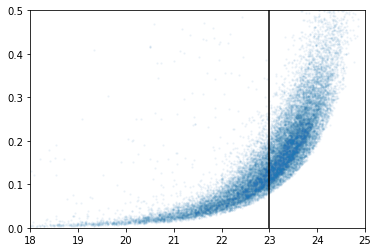

In [379]:
r, rerr = decals.fluxivar_to_mag_magerr(target_cat['flux_r'], target_cat['flux_ivar_r'])
plt.scatter(r, rerr, alpha=.05, s=2)
plt.ylim(0, .5)
plt.xlim(18,25)
plt.axvline(23, c='k')

Looks like the uncertainty around 23 is ~0.1, so not too unreasonable

In [380]:
target_cat = target_cat[r<23*u.mag]
len(target_cat)

9533

Now take only those inside 300 kpc

In [381]:
target_cat = target_cat[u.Quantity(target_cat['hostsep_phys']) < 300*u.kpc]
len(target_cat)

5073

### X-match w/ base catalogs

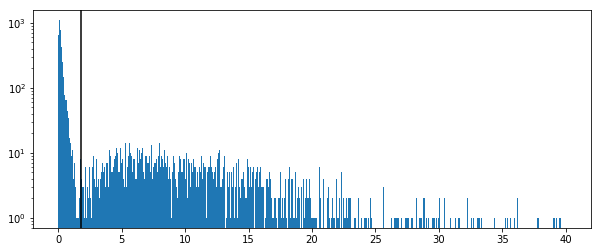

In [382]:
idx, d2d, _ = target_cat['coord'].match_to_catalog_sky(basecatalog['coord'])

plt.figure(figsize=(10, 4))
plt.hist(d2d.arcsec, bins=500, range=(0, 40), log=True)
plt.axvline(1.75, color='k')

matched = d2d<1.75*u.arcsec

target_no_match = target_cat[~matched]
target_matched = target_cat[matched]
base_matched_to_target = basecatalog[idx[matched]]


for cat in [target_no_match, target_matched]:
    cat['name'] = np.char.add(np.char.add(cat['brickname'], '_'), cat['objid'].astype(str))


#### Inspect the objects from the target catalog that have *no* sdss equivalent 

In [353]:
decals.make_cutout_comparison_table(target_no_match, subsample=6)

put this into http://skyserver.sdss.org/dr13/en/tools/chart/listinfo.aspx
name ra dec
1825p202_114 182.562395154 20.1296006128
1828p205_2660 182.881078817 20.5397094956
1827p200_3584 182.758531908 20.0628707118
1825p200_2811 182.433807811 20.045009145
1828p205_1531 182.859601921 20.4718327812
1825p197_2387 182.52840205 19.7884052184


obj,DECALS,SDSS
445446_114ra=182.5623951536031dec=20.12960061282018,,
446799_2660ra=182.8810788165301dec=20.539709495613597,,
444092_3584ra=182.75853190819663dec=20.0628707117585,,
444091_2811ra=182.43380781143355dec=20.045009145042002,,
446799_1531ra=182.85960192148713dec=20.471832781154276,,
442734_2387ra=182.52840204953097dec=19.78840521838632,,


Most look to be legit things that are missed by SDSS due to glitches/faintness in SDSS

In [354]:
decals.make_cutout_comparison_table(target_matched, subsample=6)

put this into http://skyserver.sdss.org/dr13/en/tools/chart/listinfo.aspx
name ra dec
1830p200_957 183.108413464 19.9317673926
1822p200_1552 182.375873633 19.9897677877
1830p202_4017 183.114859187 20.3756065019
1830p200_1345 182.9299793 19.9545317658
1827p200_2389 182.828777944 20.0002277879
1828p205_1635 182.842560466 20.4758412598


obj,DECALS,SDSS
444093_957ra=183.10841346383617dec=19.93176739259192,,
444090_1552ra=182.37587363339952dec=19.989767787662856,,
445448_4017ra=183.11485918711145dec=20.37560650192994,,
444093_1345ra=182.9299792995257dec=19.954531765752805,,
444092_2389ra=182.8287779444368dec=20.00022778785957,,
446799_1635ra=182.8425604661697dec=20.475841259810547,,


All the above look reasaonable

In [383]:
# annotate the target catalog with relevant columns from the base catalog

target_cat['ZQUALITY'] = -1  # no spec
target_cat['REMOVE'] = -1  # do not remove

for colnm in ['ZQUALITY', 'REMOVE']:
    target_cat[colnm][matched] = basecatalog[colnm][idx[matched]]

Out of curiosity... what do the "remove" objects look like in DECaLS? 

In [384]:
decals.show_decals_objects_in_nb(target_cat[target_cat['REMOVE'] > -1], 
                                 dr=5, subsample=9, show_reticle=True, info_cols=['REMOVE'])

1827p197-2353REMOVE = 3,1830p197-1853REMOVE = 5,1827p202-1344REMOVE = 3
1828p205-2209REMOVE = 3,1825p205-1456REMOVE = 5,1827p200-3421REMOVE = 3
1830p200-1827REMOVE = 3,1825p205-426REMOVE = 3,1830p197-2194REMOVE = 3


In [387]:
decals.make_cutout_comparison_table(target_cat[target_cat['REMOVE'] > -1], subsample=9, add_annotation=['mag_r', 'REMOVE'])

put this into http://skyserver.sdss.org/dr13/en/tools/chart/listinfo.aspx
name ra dec
1827p202_1905 182.893670453 20.2313845733
1827p202_607 182.793563251 20.161657402
1827p202_3702 182.908166601 20.3439908072
1825p202_1760 182.51777145 20.2262927458
1827p202_2902 182.891886719 20.2909774965
1830p200_3404 182.964189268 20.0870426505
1825p205_779 182.431590118 20.4244711644
1827p202_3392 182.856550587 20.3323550293
1827p197_2655 182.870171544 19.7889703781


obj,DECALS,SDSS
445447_1905ra=182.89367045254448dec=20.2313845732894mag_r=22.005653381347656REMOVE=5,,
445447_607ra=182.79356325085266dec=20.16165740202429mag_r=22.22211456298828REMOVE=2,,
445447_3702ra=182.90816660103033dec=20.343990807248318mag_r=22.699993133544922REMOVE=5,,
445446_1760ra=182.51777144997888dec=20.226292745809637mag_r=22.87218475341797REMOVE=5,,
445447_2902ra=182.89188671884023dec=20.29097749645055mag_r=21.438526153564453REMOVE=5,,
444093_3404ra=182.96418926784943dec=20.08704265049633mag_r=21.614391326904297REMOVE=5,,
446798_779ra=182.43159011757433dec=20.424471164384123mag_r=20.809627532958984REMOVE=3,,
445447_3392ra=182.85655058732536dec=20.332355029267337mag_r=17.234249114990234REMOVE=5,,
442735_2655ra=182.87017154387462dec=19.788970378108797mag_r=14.377996444702148REMOVE=3,,


In [361]:
# Now filter the remove list and the already-observed objects
target_cat = (cuts.is_clean & ~cuts.has_spec).filter(target_cat)
len(target_cat)

4486

#### Filter out those marked from marla's visual inspection 

In [362]:
mg_tab = table.Table.read(os.path.join(db._root_dir, 'mmt/binospec_inputs/mg_scoobydoo_clean.txt'), format='ascii')
mg_tab['markedbool'] = mg_tab['marked']=='true'
mg_tab

name,ra,dec,marked,markedbool
float64,float64,float64,str5,bool
21.7440681458,182.385249055,19.9009359453,false,False
22.7112236023,182.385985604,19.9069395892,false,False
22.8691616058,182.377574928,19.9151072748,false,False
22.5298194885,182.376671954,19.9177409335,false,False
21.7355003357,182.389410393,19.9220603166,false,False
22.962436676,182.389249026,19.9206694338,false,False
22.8725624084,182.367971343,19.9220032668,false,False
22.5152130127,182.379013339,19.9237897121,false,False
22.8218173981,182.375115809,19.9252894869,false,False


In [363]:
# need to match these to the target catalog

mgcoord = SkyCoord.guess_from_table(mg_tab, unit=u.deg)
idx, d2d, _ = target_cat['coord'].match_to_catalog_sky(mgcoord)
assert np.max(d2d) < 1*u.marcsec  # if this passes, all are matching to w/i a milliarcsec

In [364]:
# ensure these marked objects are indeed junk
decals.show_decals_objects_in_nb(target_cat[mg_tab['markedbool'][idx]], dr='sdss13', subsample=12, show_reticle=False)

1822p200-2431,1827p200-3003,1827p202-697
1825p202-3435,1830p200-3333,1825p202-303
1827p202-733,1830p205-2599,1830p197-2848
1830p205-1902,1830p205-1937,1827p202-726


In [365]:
target_cat = target_cat[~mg_tab['markedbool'][idx]]
len(target_cat)

4408

### Now some random eye-ball checks

In [366]:
decals.show_decals_objects_in_nb(target_cat, dr=5, subsample=6, info_cols=['mag_r'], show_reticle=False)

1827p200-1272mag_r = 21.892383575439453,1827p197-3963mag_r = 22.118722915649414,1830p200-2737mag_r = 22.65327262878418
1833p200-2487mag_r = 21.592697143554688,1827p200-2345mag_r = 22.99401092529297,1828p205-975mag_r = 22.615175247192383


## Now make specphot stars

In [367]:
flux = mmtbino.select_flux_stars(basecatalog, cattype='base')

In [368]:
decals.show_decals_objects_in_nb(flux, dr=5, show_reticle=False)

flux1,flux2,flux3
flux4,flux5,flux6
flux7,flux8,flux9
flux10,flux11,flux12
flux13,flux14,flux15
flux16,flux17,flux18
flux19,flux20,flux21
flux22,flux23,flux24
flux25,flux26,flux27
flux28,flux29,flux30
flux31,flux32,flux33


They look like perfectly reasonable flux stars to me...

## Write catalog 

In [369]:
mmtbino.write_bino_input([target_cat, flux], 'mmtbino/Feb2018_binocat.csv', overwrite=True)

/Users/erik/projects/saga/erik/mmtbino.py:58: UserWarning: Found column name type, which is a duplicate for type.  Only taking first matching column ("mmtbino_type")
  col = [_bino_typemap[s] for s in catalog[colnm]]


name,ra,dec,magnitude,type
,,,mag,
str176,float64,float64,float32,int64
1822p200-383,182.385985604,19.9069395892,22.7112,1
1822p200-507,182.376671954,19.9177409335,22.5298,1
1822p200-538,182.389410393,19.9220603166,21.7355,1
1822p200-541,182.389249026,19.9206694338,22.9624,1
1822p200-567,182.367971343,19.9220032668,22.8726,1
1822p200-632,182.367363395,19.9262923839,22.0392,1
1822p200-661,182.376890307,19.9299125281,19.6472,1
1822p200-843,182.388685389,19.9387629895,22.8902,1


In [370]:
!cp mmtbino/Feb2018_binocat.csv /Users/erik/Dropbox/SAGA/mmt/binospec_inputs/